In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://www.machinelearningplus.com/python/101-pandas-exercises-python/

##### 1. Import pandas, check version

In [4]:
print(pd.__version__)

1.0.5


##### 2. How to create a series from a list, numpy array and dict?

In [11]:
mylist = list('abcedfghi')
myarr = np.arange(6)
mydict = dict(zip(mylist, myarr))

In [12]:
pd.Series(mylist)

0    a
1    b
2    c
3    e
4    d
5    f
6    g
7    h
8    i
dtype: object

In [13]:
pd.Series(myarr)

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int32

In [14]:
mydict

{'a': 0, 'b': 1, 'c': 2, 'e': 3, 'd': 4, 'f': 5}

In [15]:
pd.Series(mydict)

a    0
b    1
c    2
e    3
d    4
f    5
dtype: int64

##### 3. How to convert the index of a series into a column of a dataframe?

In [17]:
pd.DataFrame(pd.Series(mydict)).reset_index()

,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4
5,f,5


##### 4. How to combine many series to form a dataframe?

In [25]:
ser1 = pd.Series(mylist)
ser2 = pd.Series(myarr)
ser3 = pd.Series(mydict)

In [30]:
pd.concat([ser1, ser2, ser3], axis=1)

,0,1,2
0,a,0.0,NaN
1,b,1.0,NaN
2,c,2.0,NaN
3,e,3.0,NaN
4,d,4.0,NaN
5,f,5.0,NaN
6,g,NaN,NaN
7,h,NaN,NaN
8,i,NaN,NaN
a,NaN,NaN,0.0


In [32]:
pd.DataFrame({'col1': ser1, "col2": ser2, 'col3': ser3})

,col1,col2,col3
0,a,0.0,NaN
1,b,1.0,NaN
2,c,2.0,NaN
3,e,3.0,NaN
4,d,4.0,NaN
5,f,5.0,NaN
6,g,NaN,NaN
7,h,NaN,NaN
8,i,NaN,NaN
a,NaN,NaN,0.0


##### 5. How to assign name to the series’ index? <br>
Difficulty Level: L1 Give a name to the series ser calling it ‘alphabets’. Input 

In [41]:
ser = pd.Series(list('abcedfz'), name="some_name")

In [42]:
ser

0    a
1    b
2    c
3    e
4    d
5    f
6    z
Name: some_name, dtype: object

In [44]:
ser.name = 'alphabets'

In [45]:
ser

0    a
1    b
2    c
3    e
4    d
5    f
6    z
Name: alphabets, dtype: object

##### 6. How to get the items of series A not present in series B? <br>
Difficulty Level: L2 From ser1 remove items present in ser2.

In [46]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [47]:
ser1[~ser1.isin(ser2)]  # отрицание 

0    1
1    2
2    3
dtype: int64

##### 7. How to get the items not common to both series A and series B?
Difficulty Level: L2 Get all items of ser1 and ser2 not common to both. Input 

In [48]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

Desired Output: 1, 2, 3, 6, 7, 8

In [53]:
pd.concat([ser1, ser2], axis=1)

,0,1
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


first way - convert into index

In [57]:
pd.Index(ser1.values).union(pd.Index(ser2.values))

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [58]:
pd.Index(ser1.values).intersection(pd.Index(ser2.values))

Int64Index([4, 5], dtype='int64')

In [62]:
t1 = pd.Index(ser1.values).union(pd.Index(ser2.values))
t2 = pd.Index(ser1.values).intersection(pd.Index(ser2.values))
t1[~t1.isin(t2)].values

array([1, 2, 3, 6, 7, 8], dtype=int64)

second way - use numpy:

In [64]:
print(np.union1d(ser1, ser2))
print(np.intersect1d(ser1, ser2))

[1 2 3 4 5 6 7 8]
[4 5]


In [66]:
ser_union = pd.Series(np.union1d(ser1, ser2))
ser_intersect = pd.Series(np.intersect1d(ser1, ser2))
ser_union[~ser_union.isin(ser_intersect)].values

array([1, 2, 3, 6, 7, 8], dtype=int64)

##### 8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?
Difficuty Level: L2 Compute the minimum, 25th percentile, median, 75th, and maximum of ser. Input 

np.random.normal(10, 5, 25)<br>
np.random.normal(loc, scale, size)<br>
loc - среднее арифметическое (мат ожидание)<br>
scale - standart deviation $\sigma$<br>
size - кол-во элементов, которое надо сгенерировать

(array([2., 2., 1., 4., 2., 5., 2., 2., 3., 2.]),
 array([ 1.36932829,  2.9496118 ,  4.52989532,  6.11017884,  7.69046235,
         9.27074587, 10.85102939, 12.4313129 , 14.01159642, 15.59187994,
        17.17216345]),
 <a list of 10 Patch objects>)

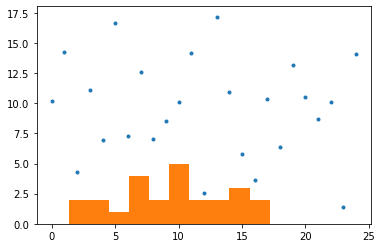

In [87]:
ser = pd.Series(np.random.normal(10, 5, 25))
plt.plot(ser.values, '.')
plt.hist(ser.values)

minimum | maximum | median

In [88]:
print(ser.median(), ser.min(), ser.max())

10.111613866415215 1.3693282884150175 17.172163452353455


In [90]:
np.sort(ser.values)[12]

10.111613866415215

**Определение <br>**
Медиана - это квантиль порядка 0.5<br>
P(X <= medX) >= 0.5<br>
P(X >= medX) >= 0.5<br>

**Определение**<br>
Кванти́ль в математической статистике — значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем <br>
Квантиль порядка а - это такая величина Xa, что <br>
P(X <= Xa) >= a<br>
P(X <= Xa) >= 1-a<br>

In [92]:
ser.quantile(q=0.25)

6.9433264723715675

In [93]:
ser.quantile(q=0.75)

12.616274629941735

In [95]:
ser.quantile(q=0.5) # получим медиану

10.111613866415215

In [96]:
np.percentile(ser, q=[0, 25, 50, 75, 100])

array([ 1.36932829,  6.94332647, 10.11161387, 12.61627463, 17.17216345])

In [98]:
np.quantile(ser, q=[0, 0.25, 0.5, 0.75, 1])

array([ 1.36932829,  6.94332647, 10.11161387, 12.61627463, 17.17216345])

##### 9. How to get frequency counts of unique items of a series?
Difficulty Level: L1 Calculte the frequency counts of each unique value ser. Input 

In [99]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))

In [104]:
np.take(list('abcdefgh'), np.random.randint(8, size=30))

array(['g', 'f', 'd', 'a', 'h', 'a', 'e', 'f', 'b', 'e', 'c', 'e', 'f',
       'd', 'a', 'f', 'g', 'b', 'g', 'e', 'g', 'e', 'g', 'd', 'g', 'a',
       'h', 'b', 'a', 'a'], dtype='<U1')

In [109]:
ser.value_counts() # подсчет уникальных значений

d    7
g    6
c    4
h    3
f    3
e    3
b    3
a    1
dtype: int64

In [115]:
print(ser.size)
print(len(ser))

30
30


In [116]:
# чтобы получить частоту, поделим на общее кол-во:
ser.value_counts() / ser.size

d    0.233333
g    0.200000
c    0.133333
h    0.100000
f    0.100000
e    0.100000
b    0.100000
a    0.033333
dtype: float64

In [117]:
# проверим, что сумма равна 1
(ser.value_counts() / ser.size).sum()

1.0

##### 10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?
Difficulty Level: L2 From ser, keep the top 2 most frequent items as it is and replace everything else as ‘Other’. Input 

In [143]:
np.random.RandomState(100) # What is this? I don't understand
ser = pd.Series(np.random.randint(1, 5, [12]))
# np.random.randint(low, high, size)

In [144]:
ser

0     1
1     4
2     3
3     3
4     3
5     3
6     3
7     4
8     4
9     2
10    2
11    4
dtype: int32

In [145]:
# start with finding 2 most frequent values
arr1 = ser.value_counts().index[[0, 1]].values
arr1

array([3, 4], dtype=int64)

In [146]:
# elements, except arr1
ser2 = ser[~ser.isin(arr1)]
ser2

0     1
9     2
10    2
dtype: int32

In [147]:
ser.replace(ser2, 'other', inplace=True)
ser

0     other
1         4
2         3
3         3
4         3
5         3
6         3
7         4
8         4
9     other
10    other
11        4
dtype: object

In [148]:
# other way:
ser[~ser.isin(arr1)] = 'other1'
ser

0     other1
1          4
2          3
3          3
4          3
5          3
6          3
7          4
8          4
9     other1
10    other1
11         4
dtype: object

##### 11. How to bin a numeric series to 10 groups of equal size?
Difficulty Level: L2 Bin the series ser into 10 equal deciles and replace the values with the bin name. Input 
<br> **https://pbpython.com/pandas-qcut-cut.html** <br>
**pandas.qcut(x, q)**, <br>
x - 1d ndarray or Series <br>
q - int or list-like of float <br>
Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.<br>
**pandas.cut(x, bins)**<br>
Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.<br>
x - array-like, The input array to be binned. Must be 1-dimensional.<br>
bins - int, sequence of scalars, or IntervalIndex

In [161]:
ser = pd.Series(np.random.random(20))
# generate 20 random floats from
# the half-open interval [0.0, 1.0). 

In [162]:
print(ser.values)

[0.95436719 0.72624801 0.62194031 0.30085322 0.90519522 0.21187078
 0.93315354 0.49311991 0.9306327  0.61216577 0.80070567 0.11864562
 0.72312156 0.98329739 0.74616525 0.39329824 0.37469208 0.92899284
 0.26733705 0.74931359]


In [163]:
ser.describe()

count    20.000000
mean      0.638756
std       0.277889
min       0.118646
25%       0.388647
50%       0.724685
75%       0.911145
max       0.983297
dtype: float64

In [173]:
pd.qcut(ser, 4).cat.categories
# Accessor object for
# categorical properties of the Series values.

IntervalIndex([(0.118, 0.389], (0.389, 0.725], (0.725, 0.911], (0.911, 0.983]],
              closed='right',
              dtype='interval[float64]')

In [158]:
pd.qcut(ser, 10)

0                        (0.517, 0.694]
1                         (0.738, 0.94]
2                       (0.0754, 0.147]
3                        (0.452, 0.517]
4                        (0.517, 0.694]
5                        (0.452, 0.517]
6                       (0.0754, 0.147]
7                      (0.0226, 0.0754]
8                      (0.0226, 0.0754]
9                          (0.147, 0.2]
10                       (0.694, 0.738]
11                       (0.286, 0.452]
12    (-0.00016200000000000003, 0.0226]
13                         (0.2, 0.286]
14                         (0.2, 0.286]
15                       (0.694, 0.738]
16    (-0.00016200000000000003, 0.0226]
17                         (0.147, 0.2]
18                        (0.738, 0.94]
19                       (0.286, 0.452]
dtype: category
Categories (10, interval[float64]): [(-0.00016200000000000003, 0.0226] < (0.0226, 0.0754] < (0.0754, 0.147] < (0.147, 0.2] ... (0.452, 0.517] < (0.517, 0.694] < (0.694, 0.738] < (0.738

In [159]:
pd.qcut(ser, q=[0, .10, .20, .3, .4, .5, .6, .7, .8, .9, 1], 
        labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']).head()

0     8th
1    10th
2     3rd
3     7th
4     8th
dtype: category
Categories (10, object): [1st < 2nd < 3rd < 4th ... 7th < 8th < 9th < 10th]

##### 12. How to convert a numpy array to a dataframe of given shape? (L1)
Difficulty Level: L1 Reshape the series ser into a dataframe with 7 rows and 5 columns Input 

In [174]:
ser = pd.Series(np.random.randint(1, 10, 35))

In [180]:
pd.DataFrame(ser.values.reshape((7, 5)))

,0,1,2,3,4
0,5,2,6,2,7
1,4,8,6,2,4
2,3,1,4,5,4
3,1,2,7,1,6
4,9,7,3,4,6
5,6,3,8,5,9
6,3,8,4,5,7


##### 13. How to find the positions of numbers that are multiples of 3 from a series?
Difficulty Level: L2 Find the positions of numbers that are multiples of 3 from ser. Input

In [185]:
ser = pd.Series(np.random.randint(1, 10, 7))

In [186]:
ser

0    8
1    6
2    2
3    2
4    6
5    5
6    8
dtype: int32

In [189]:
ser[ser%3==0].index.values

array([1, 4], dtype=int64)

In [191]:
np.argwhere(ser.values % 3==0)

array([[1],
       [4]], dtype=int64)

##### 14. How to extract items at given positions from a series
Difficulty Level: L1 From ser, extract the items at positions in list pos. Input 

In [192]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

In [194]:
ser.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

In [195]:
ser.iloc[pos]

0     a
4     e
8     i
14    o
20    u
dtype: object

In [196]:
ser.take(pos)

0     a
4     e
8     i
14    o
20    u
dtype: object

##### 15. How to stack two series vertically and horizontally ?
Difficulty Level: L1 Stack ser1 and ser2 vertically and horizontally (to form a dataframe). Input 

In [198]:
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

In [199]:
ser1.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [200]:
ser2.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

In [202]:
pd.concat([ser1, ser2], axis=0) # vertically

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object

In [203]:
pd.concat([ser1, ser2], axis=1) # horizontally

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [204]:
# Vertically - other way
ser1.append(ser2)

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object

##### 16. How to get the positions of items of series A in another series B?
Difficulty Level: L2 Get the positions of items of ser2 in ser1 as a list. Input 

In [205]:
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])

desired out: [5, 4, 0, 8]

In [209]:
np.where(ser1.isin(ser2))

(array([0, 4, 5, 8], dtype=int64),)

In [222]:
list(np.array(
    [np.where(ser1 == i) for i in ser2]
             ).flatten())

[5, 4, 0, 8]

In [220]:
# use tolist() instead of flatten
[np.where(i == ser1)[0].tolist()[0] for i in ser2]

[5, 4, 0, 8]

In [223]:
[pd.Index(ser1).get_loc(i) for i in ser2]

[5, 4, 0, 8]

##### 17. How to compute the mean squared error on a truth and predicted series?
Difficulty Level: L2 Compute the mean squared error of truth and pred series. Input <br>
$\text{mean squared error}=\dfrac{\sum{(truth-pred)^2}}{N}$

In [244]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

In [245]:
np.mean((truth-pred)**2)

0.34739640510031766

In [246]:
np.sum((truth-pred)**2)/truth.size

0.34739640510031766

In [248]:
(truth-pred).var()

0.050019712962977525

##### 18. How to convert the first character of each element in a series to uppercase?
Difficulty Level: L2 Change the first character of each word to upper case in each word of ser. 

In [249]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [250]:
ser.str.title()

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [252]:
ser.map(lambda x: x.title())

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [253]:
ser.map(lambda x: x[0].upper() + x[1:])

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [254]:
ser.apply(lambda x: x[0].upper() + x[1:])

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [255]:
pd.Series([i.title() for i in ser])

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [256]:
# I think, there are even more ways

##### 19. How to calculate the number of characters in each word in a series?
Difficulty Level: L2 Input 

In [257]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [262]:
ser.str.len()

0    3
1    2
2    4
3    4
dtype: int64

In [263]:
ser.map(lambda x: len(x))

0    3
1    2
2    4
3    4
dtype: int64

##### 20. How to compute difference of differences between consequtive numbers of a series?
Difficulty Level: L1 Difference of differences between the consequtive numbers of ser. Input 

In [266]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

Desired Output <br>
[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]<br>
[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]

In [267]:
np.diff(ser.values)

array([2, 3, 4, 5, 6, 6, 8], dtype=int64)

In [268]:
np.diff(ser.values, n=2)

array([1, 1, 1, 1, 0, 2], dtype=int64)

In [273]:
ser.diff(periods=1).tolist()

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]

In [274]:
ser.diff(periods=1).diff(periods=1).tolist()

[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]

##### 21. How to convert a series of date-strings to a timeseries?
Difficiulty Level: L2 Input 

In [275]:
ser = pd.Series(['01 Jan 2010', '02-02-2011',
                 '20120303', '2013/04/04',
                 '2014-05-05', '2015-06-06T12:20'])

Desired Output <br>
0   2010-01-01 00:00:00<br>
1   2011-02-02 00:00:00<br>
2   2012-03-03 00:00:00<br>
3   2013-04-04 00:00:00<br>
4   2014-05-05 00:00:00<br>
5   2015-06-06 12:20:00<br>
dtype: datetime64[ns]<br>

In [278]:
pd.to_datetime(ser) 

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

In [279]:
from dateutil.parser import parse
ser.map(lambda x: parse(x))

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

##### 22. How to get the day of month, week number, day of year and day of week from a series of date strings?
Difficiulty Level: L2 Get the day of month, week number, day of year and day of week from ser. Input 

In [280]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

Desired output<br>
Date:  [1, 2, 3, 4, 5, 6] - **day**<br>
Week number:  [53, 5, 9, 14, 19, 23] - **week/weekofyear**<br>
Day num of year:  [1, 33, 63, 94, 125, 157] - **dayofyear**<br>
Day of week:  ['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday'] - **day_name()/weekday_name**

In [288]:
pd.to_datetime(ser).dt.day.tolist() # day of month

[1, 2, 3, 4, 5, 6]

In [290]:
pd.to_datetime(ser).dt.week.tolist()

[53, 5, 9, 14, 19, 23]

In [291]:
pd.to_datetime(ser).dt.dayofyear.tolist()

[1, 33, 63, 94, 125, 157]

In [292]:
pd.to_datetime(ser).dt.weekday.tolist()

[4, 2, 5, 3, 0, 5]

In [297]:
pd.to_datetime(ser).dt.day_name().tolist()

['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']

##### 23. How to convert year-month string to dates corresponding to the 4th day of the month?
Difficiulty Level: L2 Change ser to dates that start with 4th of the respective months. Input 

In [298]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])

Desired Output<br>
0   2010-01-04<br>
1   2011-02-04<br>
2   2012-03-04<br>
dtype: datetime64[ns]

In [299]:
pd.to_datetime(ser)

0   2010-01-01
1   2011-02-01
2   2012-03-01
dtype: datetime64[ns]

In [303]:
pd.Timedelta(3, unit='D')

Timedelta('3 days 00:00:00')

In [304]:
ser.apply(lambda x: pd.to_datetime(x)+pd.Timedelta(3, unit='D'))

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

In [307]:
# Solution 2
ser.map(lambda x: parse('04 ' + x))

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

In [313]:
# Solution 3
ser_ts = ser.map(lambda x: parse(x))
ser_ts

0   2010-01-07
1   2011-02-07
2   2012-03-07
dtype: datetime64[ns]

In [318]:
ser_datestr = ser_ts.dt.year.astype('str') +\
 '-' + ser_ts.dt.month.astype('str') + \
'-' + '04'
ser_datestr

0    2010-1-04
1    2011-2-04
2    2012-3-04
dtype: object

In [319]:
[parse(i).strftime('%Y-%m-%d') for i in ser_datestr]

['2010-01-04', '2011-02-04', '2012-03-04']

##### 24. How to filter words that contain atleast 2 vowels from a series?
Difficiulty Level: L3 From ser, extract words that contain atleast 2 vowels. Input 

In [320]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])

Desired Output
0     Apple
1    Orange
4     Money
dtype: object

In [322]:
vowels = ['a', 'e', 'i', 'o', 'u']

In [332]:
ser.str.contains('[aeiou]{2}', regex=True)

0    False
1    False
2    False
3    False
4    False
dtype: bool